# 1. Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.model_selection import train_test_split

# 2. Importing data

In [11]:
claimants_data = pd.read_csv('claimants.csv')
claimants_data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [17]:
claimants_data.shape

(1340, 6)

In [15]:
claimants_data.drop(columns='CASENUM',inplace=True)
claimants_data

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


# 3.Data Understanding

In [5]:
claimants_data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [7]:
claimants_data.shape

(1340, 7)

In [9]:
claimants_data.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [19]:
claimants_data.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [21]:
claimants_data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

# 4 Data Cleaning

In [25]:
claimants_data =claimants_data.dropna()
claimants_data.shape

(1096, 6)

In [36]:
claimants_data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# 5.Data Preapration
1 Divide Input and Output
2 Split into train and Test(80% Train 20% Test)


In [34]:
X=claimants_data.drop('ATTORNEY',axis=1)# Input
Y=claimants_data[['ATTORNEY']]# Output

In [38]:
X.shape,Y.shape

((1096, 5), (1096, 1))

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=227,shuffle=True)


In [30]:
X_train,X_test,Y_train,Y_test

(      CLMSEX  CLMINSUR  SEATBELT  CLMAGE   LOSS
 1008     0.0       1.0       0.0    63.0  1.985
 390      1.0       1.0       0.0    36.0  1.351
 959      1.0       1.0       0.0    39.0  0.310
 1013     1.0       1.0       0.0    40.0  1.903
 1        1.0       0.0       0.0    18.0  0.891
 ...      ...       ...       ...     ...    ...
 930      1.0       0.0       0.0    46.0  0.075
 1075     0.0       1.0       0.0     7.0  0.640
 473      0.0       1.0       0.0     6.0  5.505
 1069     0.0       1.0       0.0    33.0  0.080
 37       1.0       1.0       0.0    50.0  3.700
 
 [876 rows x 5 columns],
       CLMSEX  CLMINSUR  SEATBELT  CLMAGE   LOSS
 117      1.0       1.0       0.0    41.0  3.595
 392      1.0       1.0       0.0     6.0  0.495
 652      1.0       1.0       0.0     0.0  0.116
 858      0.0       1.0       0.0    11.0  0.646
 701      0.0       1.0       0.0    49.0  0.330
 ...      ...       ...       ...     ...    ...
 928      1.0       1.0       0.0    50.0 

In [31]:
#training Sample
X_train.shape,Y_train.shape

((876, 5), (876, 1))

In [32]:
#texting Sample
X_test.shape,Y_test.shape

((220, 5), (220, 1))

# 6.Model Building

In [33]:
LogisticRegression=LogisticRegression().fit(X_train,Y_train)

C:\Users\ds\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# 7.Model Testing 8 Model Evaluation


**Train Accuracy**

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [35]:
y_predict_train=LogisticRegression.predict(X_train)


In [36]:
accuracy_score=accuracy_score(Y_train,y_predict_train)


In [37]:
print(accuracy_score)

0.7134703196347032


In [38]:
confusion_matrix(Y_train,y_predict_train)

array([[296, 159],
       [ 92, 329]], dtype=int64)

<AxesSubplot:>

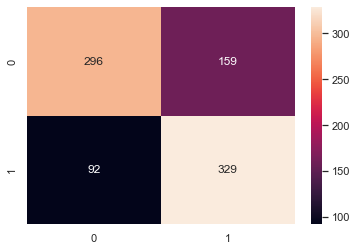

In [58]:
sns.heatmap(confusion_matrix(Y_train,y_predict_train), annot=True,fmt='g')

In [39]:
print(classification_report(Y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       455
           1       0.67      0.78      0.72       421

    accuracy                           0.71       876
   macro avg       0.72      0.72      0.71       876
weighted avg       0.72      0.71      0.71       876



**Test Accuracy**

In [40]:
Y_test

,ATTORNEY
117,0
392,1
652,0
858,0
701,0
...,...
928,1
501,1
1046,1
1155,1


In [53]:
y_predict_test=LogisticRegression.predict(X_test)


In [54]:

#accuracy_score=accuracy_score(Y_test,y_predict_test)


In [55]:
confusion_matrix(Y_test,y_predict_test)

array([[74, 49],
       [22, 75]], dtype=int64)

<AxesSubplot:>

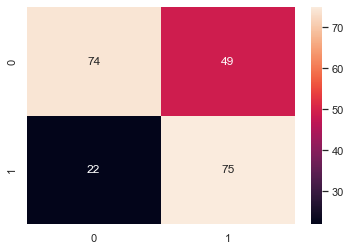

In [57]:
sns.heatmap(confusion_matrix(Y_test,y_predict_test), annot=True,fmt='g')

In [56]:
print(accuracy_score)

0.7134703196347032


In [51]:
# roc-receiver oprating charactristics  auc-area under the curve
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y,LogisticRegression.predict_proba (X)[:,1])

auc = roc_auc_score(Y_train,y_predict_train)



Text(0, 0.5, 'True Positive Rate')

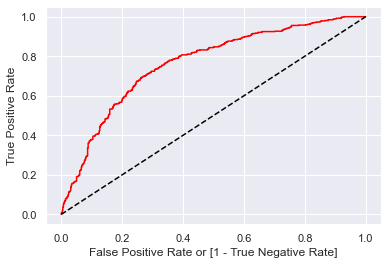

In [52]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# 9 Model Deployment

In [60]:
from pickle import dump

In [61]:
dump(LogisticRegression,open('LogisticRegression.pkl','wb')) #Serialzation

In [62]:
from pickle import load

In [64]:
loaded_model = load(open('LogisticRegression.pkl','rb')) #Deserialzation

In [65]:
loaded_model.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
      dtype=int64)

# The End